<a href="https://colab.research.google.com/github/Sepideh-Tabrik/Heartbeat_GitHub/blob/main/Heartbeat_Step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the necessary packages and define the paths:**

In [59]:
# Install necessary libraries quietly
# !pip install tensorflow -q
# !pip install keras -q
# !pip install scikit-learn -q
# !pip install pandas -q
# !pip install numpy -q
# !pip install matplotlib -q

# Verify installation and import libraries
import tensorflow as tf
import keras
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
# Mount Google Drive in Colab if I want to upload the dataset from Google Drive:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Heartbeat_Project

# remove the sample_data directory and all of its contents
!rm -rf /content/sample_data

# **Define the necessary functions:**

In [121]:
def addColumnsToDataframe(df):
    """
    As the dataset is composed with 188 columns with the 188th columns as the category values,
    so we give the last column the name 'target', others named with 'c_0 to c_186'
    """
    num_columns= df.shape[1]
    feature_col_name = ['c_' + str(i) for i in range(0, num_columns - 1)]
    df_columns = feature_col_name + ['target']
    df.columns = df_columns
    return df

def convertColumnAsInt(df, column):
    """
    As the category value is in float type. We want to get the int to identify the category.
    """
    df[column] = df[column].astype(int)
    return df


def getBarChartFromCategoryValueCounts(category_value_counts):
    """
    We call the plot over the pandas series object to plot the category count values
    """

    # Sample data
    categories = category_value_counts.index
    values = category_value_counts.values
    colors = ['blue', 'green', 'orange', 'yellow', 'red']  # Replace with desired colors
    labels = ['Normal', 'Unclassified','Premature', 'Supraventicular', 'Fusion']  # Replace with corresponding labels

    plt.figure(figsize=(8, 5))

    # Plot each bar with a unique color and label
    bars = plt.bar(range(len(categories)), values, color=colors)  # Use range(len(categories)) as x-coordinates

    plt.title('Category Count Values')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.grid(False)

    # Set the custom tick labels
    plt.xticks(range(len(categories)), categories, rotation=360)

    # Add a legend
    plt.legend(bars, labels, title='Legend Title')  # Associate bars with labels

    # Label each bar with its count value
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

    plt.show()


def showTop10DataInChart(df):

    xDataAxis = list(range(0, df.shape[1]))
    yDataRows = list(df.values[1: 10])
    if df.target[0] == 0:
      plt.figure(figsize=(8, 5))
      for y in yDataRows:
        plt.plot(xDataAxis, y)
        plt.title('PTB Normal')
        plt.xlabel('sample datapoints')
        plt.ylabel('Heartbeat Amplitude')
      plt.show()
    if df.target[0] == 1:
      plt.figure(figsize=(8, 5))
      for y in yDataRows:
        plt.plot(xDataAxis, y)
        plt.title('PTB Abnormal')
        plt.xlabel('sample datapoints')
        plt.ylabel('Heartbeat Amplitude')
      plt.show()


# **Read the CSV files of the PTB Diagnostic ECG Database:**

In [41]:
# PTB Normal
ptbdb_normal = pd.read_csv('ptbdb_normal.csv', header=None)
# Change the names of the columns
ptbdb_normal_with_columns = addColumnsToDataframe(ptbdb_normal)
# convert target varaible from float to string
ptbdb_normal_with_columns = convertColumnAsInt(ptbdb_normal_with_columns, 'target')
# get the category value counts
ptbdb_normal_category_counts = ptbdb_normal_with_columns['target'].value_counts()
#getBarChartFromCategoryValueCounts(ptbdb_normal_category_counts)

# PTB Abnormal
ptbdb_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)
# Change the names of the columns
ptbdb_abnormal_with_columns = addColumnsToDataframe(ptbdb_abnormal)
# convert target varaible from float to string
ptbdb_abnormal_with_columns = convertColumnAsInt(ptbdb_abnormal_with_columns, 'target')
# get the category value counts
ptbdb_abnormal_category_count = ptbdb_abnormal_with_columns['target'].value_counts()
#getBarChartFromCategoryValueCounts(ptbdb_abnormal_category_count)


# **Check the meanings of the Data Rows(first 10 rows as example):**


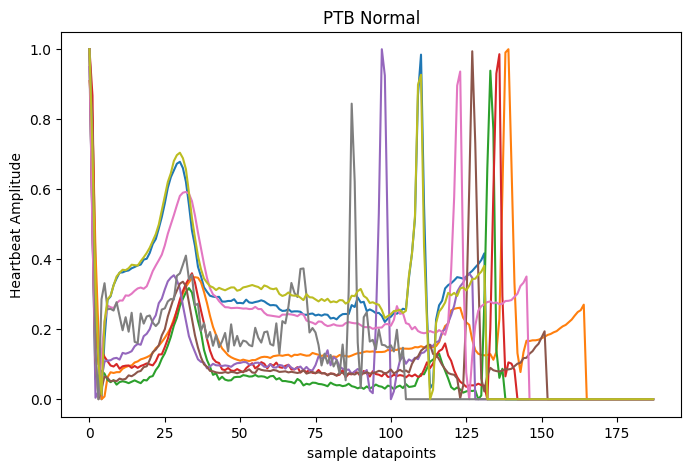

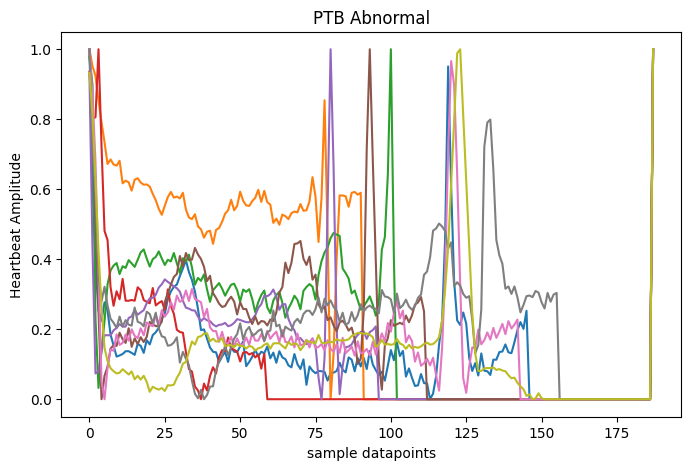

In [94]:
showTop10DataInChart(ptbdb_normal_with_columns)
showTop10DataInChart(ptbdb_abnormal_with_columns)

# **Read the CSV files of the MIT-BIH Arrhythmia Dataset:**

In [117]:
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_train_with_columns = addColumnsToDataframe(mitbih_train)
mitbih_train_with_columns = convertColumnAsInt(mitbih_train_with_columns, 'target')


mitbih_test = pd.read_csv('mitbih_test.csv', header=None)
mitbih_test_with_columns = addColumnsToDataframe(mitbih_test)
mitbih_test_with_columns = convertColumnAsInt(mitbih_test_with_columns, 'target')


# **plot the category count values of the MIT data**

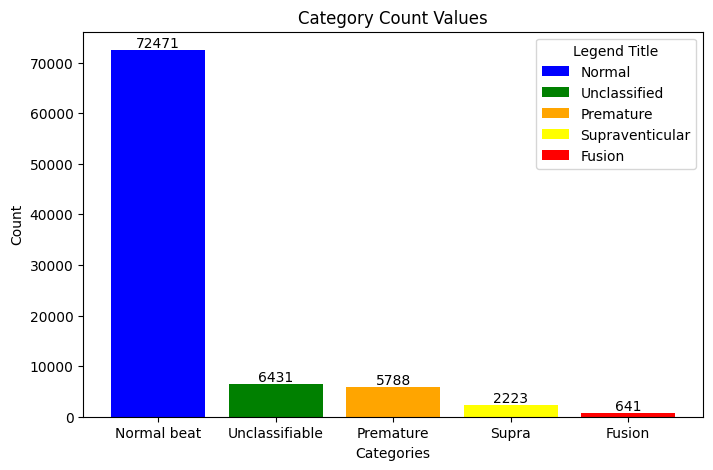

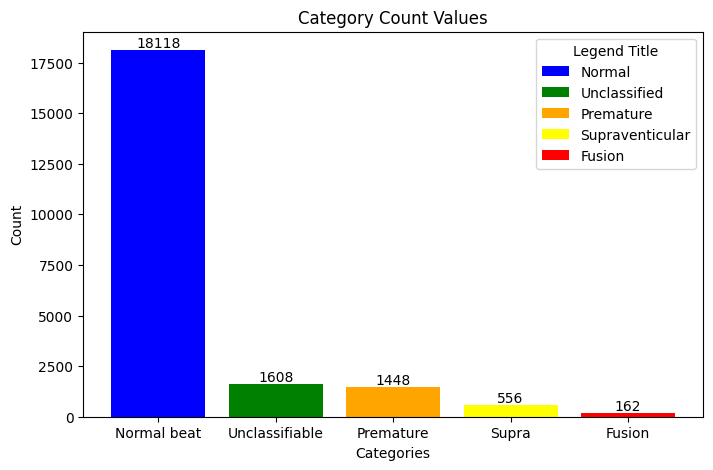

In [122]:
getBarChartFromCategoryValueCounts(mitbih_train_with_columns['target'].value_counts())
getBarChartFromCategoryValueCounts(mitbih_test_with_columns['target'].value_counts())

# **First information about both datasets:**

In [89]:
# MIT train Info:

print('The MIT train dataset has', mitbih_train.shape[0], 'rows and', mitbih_train.shape[1], 'columns.\n'
      'Each row represents a single heartbeat, and each column from c-0 to c-186 contains a datapoint for one heartbeat.', '\n'
      'the percentage of missing values is', mitbih_train.isnull().mean().mean() * 100)

# MIT test Info:
print('\n\nThe MIT test dataset has', mitbih_test.shape[0], 'rows and', mitbih_test.shape[1], 'columns.\n'
      'Each row represents a single heartbeat, and each column from c-0 to c-186 contains a datapoint for one heartbeat.', '\n'
      'the percentage of missing values is', mitbih_test.isnull().mean().mean() * 100)

print("\n\nThe both datasets have no missing values.")
print("\n\nThe features are numeric. All columns have the type float64, while the target column is int32.")

The MIT train dataset has 87554 rows and 188 columns.
Each row represents a single heartbeat, and each column from c-0 to c-186 contains a datapoint for one heartbeat. 
the percentage of missing values is 0.0


The MIT test dataset has 21892 rows and 188 columns.
Each row represents a single heartbeat, and each column from c-0 to c-186 contains a datapoint for one heartbeat. 
the percentage of missing values is 0.0


The both datasets have no missing values.


The features are numeric. All columns have the type float64, while the target column is int32.


In [118]:
# Define your mapping dictionary
class_mapping = {
    0: 'Normal beat',
    1: 'Supra',
    2: 'Premature',
    3: 'Fusion',
    4: 'Unclassifiable'
}

# Convert target variable to categorical in both training and test datasets
mitbih_train['target'] = mitbih_train['target'].map(class_mapping)
mitbih_test['target'] = mitbih_test['target'].map(class_mapping)

# Drop rows where 'target' is 'Unclassifiable beat'
mitbih_train = mitbih_train[mitbih_train['target'] != 'Unclassifiable']
mitbih_test = mitbih_test[mitbih_test['target'] != 'Unclassifiable']


mitbih_train.head()
mitbih_test.head()



,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_178,c_179,c_180,c_181,c_182,c_183,c_184,c_185,c_186,target
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beat
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beat
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beat
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beat
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal beat


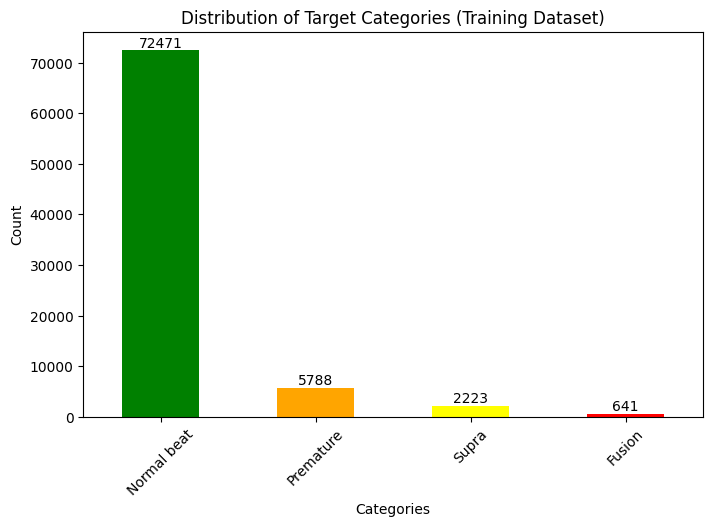

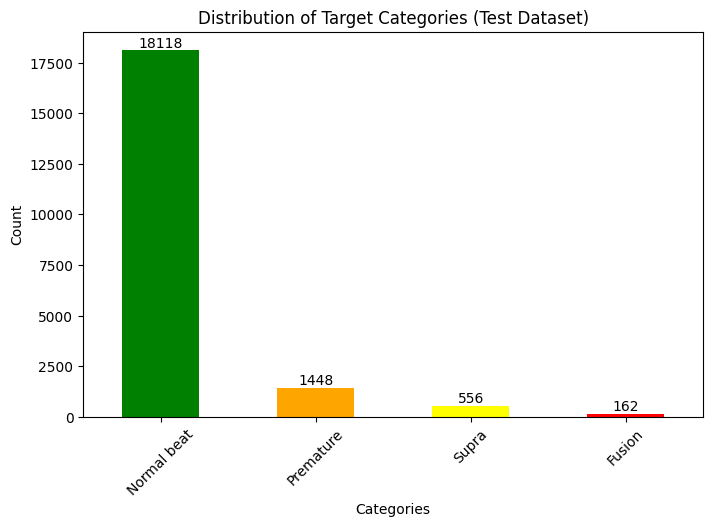

In [126]:
value_counts_series = mitbih_train['target'].value_counts()
colors = ['green', 'orange', 'yellow','red']
value_counts_series
plt.figure(figsize=(8, 5))
bar_chart = value_counts_series.plot(kind='bar', color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Categories (Training Dataset)')
plt.grid(False)
plt.xticks(rotation=45)
for i in bar_chart.containers:
    bar_chart.bar_label(i, label_type='edge')
plt.show()

value_counts_series = mitbih_test['target'].value_counts()
colors = ['green', 'orange', 'yellow','red']
value_counts_series
plt.figure(figsize=(8, 5))
bar_chart = value_counts_series.plot(kind='bar', color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Categories (Test Dataset)')
plt.grid(False)
plt.xticks(rotation=45)
for i in bar_chart.containers:
    bar_chart.bar_label(i, label_type='edge')
plt.show()

In [2]:
MIT_train = pd.read_csv('mitbih_train.csv')
MIT_test = pd.read_csv('mitbih_test.csv')

PTB_normal = pd.read_csv('ptbdb_normal.csv')
PTB_abnormal = pd.read_csv('ptbdb_abnormal.csv')

In [ ]:
new_column_names = [str(i) for i in range(188)]  # I defined the name of columns from 0 to 188
MIT_train.columns = new_column_names
MIT_test.columns = new_column_names
PTB_normal.columns = new_column_names
PTB_abnormal.columns = new_column_names

In [ ]:
MIT_train.head()


NameError: name 'MIT_train' is not defined

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_MIT_Train = MIT_train.isnull().mean().mean() * 100
missing_percentage_MIT_Test = MIT_train.isnull().mean().mean() * 100
missing_percentage_PTB_Normal = MIT_train.isnull().mean().mean() * 100
missing_percentage_PTB_Abnormal = MIT_train.isnull().mean().mean() * 100

# Print the percentage of missing values
print('missing_percentage of MIT train dataset', missing_percentage_MIT_Train)
print('missing_percentage of MIT test dataset', missing_percentage_MIT_Test)
print('missing_percentage of PTB Normal dataset', missing_percentage_PTB_Normal)
print('missing_percentage of PTB Abnormal dataset', missing_percentage_PTB_Abnormal)

In [ ]:
# Plot the 5 different types of MIT train heartbeat signal
plt.figure(figsize=(20,5))

plt.plot(MIT_train.iloc[0, :-1],'MediumSeaGreen', label= 'Normal')
plt.plot(MIT_train.iloc[72470, :-1], 'firebrick', label='Supraventicular')
plt.plot(MIT_train.iloc[74693, :-1], 'tomato' , label='Venticular')
plt.plot(MIT_train.iloc[80481, :-1], 'crimson' , label='Fusion')
plt.plot(MIT_train.iloc[81122, :-1],'indianred', label='Unclassified')

plt.title('MIT Heartbeat ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
# Plot the 5 different types of normal and abnormal PTB heartbeat signal
plt.figure(figsize=(20,5))

plt.plot(PTB_normal.iloc[10, :-1],'green', label= 'Normal')
plt.plot(PTB_abnormal.iloc[10, :-1], 'red', label='Abnormal')

plt.title('PTB Heartbeat ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Commentary: This plot shows the electrical activity of a normal heartbeat.
# The x-axis represents time, and the y-axis represents the amplitude of the ECG signal.
#The shape of the waveform provides insights into the heart’s condition.

# Validation: To validate the normality of this heartbeat, you could compare it
# with the average normal heartbeat signal or use statistical tests to compare
# the distributions of different classes.

In [ ]:
# Class Distribution Bar Chart:
class_distribution = MIT_train['187'].value_counts()

plt.figure(figsize=(10,5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Heartbeat Class')
plt.ylabel('Frequency')
plt.show()
# Commentary: This bar chart shows the distribution of different heartbeat classes.
# It’s important for understanding the class imbalance in the dataset.

# Validation: You can validate the class imbalance by calculating the proportion
# of each class and comparing it with the expected distribution.